In [75]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import seaborn as sns

In [76]:
con = sql.connect("mental_health.sqlite")
cur = con.cursor()

In [77]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
cur.execute(query)
tables = cur.fetchall()

In [78]:
tables

[('Answer',), ('Question',), ('Survey',)]

In [79]:
columnDict = {}

for i,table in enumerate(tables):
    query = "SELECT * FROM %s;" % table
    cur.execute(query)
    cols = list(cur.description)
    valuelist = []
    for j, col in enumerate(cols):
        collist = list(col)
        valuelist.append(collist[0])
    columnDict[table] = valuelist

columnDict

{('Answer',): ['AnswerText', 'SurveyID', 'UserID', 'QuestionID'],
 ('Question',): ['questiontext', 'questionid'],
 ('Survey',): ['SurveyID', 'Description']}

In [80]:
query = "SELECT SurveyID, Description from Survey"
cur.execute(query)
cur.fetchall()

[(2014, 'mental health survey for 2014'),
 (2016, 'mental health survey for 2016'),
 (2017, 'mental health survey for 2017'),
 (2018, 'mental health survey for 2018'),
 (2019, 'mental health survey for 2019')]

In [81]:
query = "SELECT questiontext from Question"
cur.execute(query)
cur.fetchall()

[('What is your age?',),
 ('What is your gender?',),
 ('What country do you live in?',),
 ('If you live in the United States, which state or territory do you live in?',),
 ('Are you self-employed?',),
 ('Do you have a family history of mental illness?',),
 ('Have you ever sought treatment for a mental health disorder from a mental health professional?',),
 ('How many employees does your company or organization have?',),
 ('Is your employer primarily a tech company/organization?',),
 ('Does your employer provide mental health benefits as part of healthcare coverage?',),
 ('Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',),
 ('Would you bring up a mental health issue with a potential employer in an interview?',),
 ('Is your primary role within your company related to tech/IT?',),
 ('Do you know the options for mental health care available under your employer-provided health coverage?',),
 ('Ha

A few choices for the questions to look at:

* 'What is your age?'
* 'What is your gender?'
* 'What is your race?'
* 'What country do you live in?'
* 'Is your employer primarily a tech company/organization?'
* 'Are you self-employed?'
* 'How many employees does your company or organization have?'
* 'Do you have a family history of mental illness?'
* 'Have you ever sought treatment for a mental health disorder from a mental health professional?'
* 'Do you currently have a mental health disorder?'
* 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?'
* 'Are you openly identified at work as a person with a mental health issue?'
* 'Has being identified as a person with a mental health issue affected your career?'
* 'Does your employer provide mental health benefits as part of healthcare coverage?'
* 'Does your employer provide resources to learn more about mental health issues and how to seek help?'
* 'Do you believe your productivity is ever affected by a mental health issue?'
* 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?'
* 'Would you feel comfortable discussing a mental health issue with your coworkers?'
* 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?'

These questions are broadly divided into three categories: general demographics, job questions, and mental health disorder questions. The point is to see if country lived in,gender, age etc has an effect on comfort with sharing mental health issues or going to get help or diagnosed. 

Another dimension of analysis is an overview of the state of mental health awareness and discussion in the industry. Looking at factors like size of company, self-employment, and whether mental healthcare is covered by the company's insurance are certain questions I want to look at. 

The last portion are mental health questions, looking at the background of the employee's mental health, and their comfort with sharing their mental health. Looking at how mental health may affect their jobs. 

Overall, this is a broad analysis trying to figure out what should be looked at in more detail.


In [82]:
query = """SELECT Q.questiontext as Ques,
A.answertext as Ans,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Ques IN ('What is your age?')
"""
cur.execute(query)
cur.fetchall()

[('What is your age?', '-1', 391),
 ('What is your age?', '-1', 716),
 ('What is your age?', '-1', 1128),
 ('What is your age?', '-1', 3447),
 ('What is your age?', '-1', 3449),
 ('What is your age?', '-29', 144),
 ('What is your age?', '0', 3981),
 ('What is your age?', '11', 1091),
 ('What is your age?', '15', 2069),
 ('What is your age?', '17', 1354),
 ('What is your age?', '18', 44),
 ('What is your age?', '18', 94),
 ('What is your age?', '18', 119),
 ('What is your age?', '18', 283),
 ('What is your age?', '18', 288),
 ('What is your age?', '18', 479),
 ('What is your age?', '18', 483),
 ('What is your age?', '18', 2715),
 ('What is your age?', '18', 2803),
 ('What is your age?', '19', 76),
 ('What is your age?', '19', 130),
 ('What is your age?', '19', 151),
 ('What is your age?', '19', 593),
 ('What is your age?', '19', 683),
 ('What is your age?', '19', 750),
 ('What is your age?', '19', 992),
 ('What is your age?', '19', 1021),
 ('What is your age?', '19', 1028),
 ('What is y

In [83]:
query = """SELECT Q.questiontext as Ques,
AVG(A.answertext) as Ans,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Ques IN ('What is your age?') AND A.answertext > 0
"""
cur.execute(query)
cur.fetchall()

[('What is your age?', 33.97981477083828, 1091)]

We see a few of the answers were nonsense so the conditiion that the original responses needed to be positiive. I am assuming the eleven and fifteen year old are legitimate responses because I cannot investigate it. 

Regardless, the result shows that the age skews young. 

With that out of the way, the next step will be to gather a bunch of demographic data with a SQL Query then put them into a dataframe to analyze the overall makeup of the group surveyed. This will roughly correspond to the first 15 questions, or until the "Do you currently have a mental health disorder?" question.


In [84]:
query = """SELECT A.UserID as User,
A.answertext as Age
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('What is your age?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.read_sql_query(query, con)

In [85]:
DemographicsDF.head()

,User,Age
0,391,-1
1,716,-1
2,1128,-1
3,3447,-1
4,3449,-1


In [86]:
query = """SELECT A.answertext as Gender,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('What is your gender?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [87]:
DemographicsDF.head()

,User,Age,Gender
0,391,-1,All
1,716,-1,Male
2,1128,-1,p
3,3447,-1,-1
4,3449,-1,-1


In [88]:
query = """SELECT A.answertext as Race,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('What is your race?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [89]:
DemographicsDF.head()

,User,Age,Gender,Race
0,3447,-1,-1,-1
1,3449,-1,-1,-1
2,3981,0,male,White
3,2715,18,Male,-1
4,2803,18,male/androgynous,-1


In [90]:
query = """SELECT A.answertext as Country,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('What country do you live in?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [91]:
DemographicsDF.head()

,User,Age,Gender,Race,Country
0,3447,-1,-1,-1,-1
1,3449,-1,-1,-1,-1
2,3981,0,male,White,United States of America
3,2715,18,Male,-1,United Kingdom
4,2803,18,male/androgynous,-1,Canada


In [92]:
query = """SELECT A.answertext as TechCompany,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Is your employer primarily a tech company/organization?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [93]:
query = """SELECT A.answertext as SelfEmployed,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Are you self-employed?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [94]:
DemographicsDF.head()

,User,Age,Gender,Race,Country,TechCompany,SelfEmployed
0,3447,-1,-1,-1,-1,-1,1
1,3449,-1,-1,-1,-1,-1,1
2,3981,0,male,White,United States of America,0,0
3,2715,18,Male,-1,United Kingdom,0,0
4,2803,18,male/androgynous,-1,Canada,-1,1


In [95]:
query = """SELECT A.answertext as EmployeeCount,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('How many employees does your company or organization have?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [96]:
DemographicsDF.head()

,User,Age,Gender,Race,Country,TechCompany,SelfEmployed,EmployeeCount
0,3447,-1,-1,-1,-1,-1,1,-1
1,3449,-1,-1,-1,-1,-1,1,-1
2,3981,0,male,White,United States of America,0,0,500-1000
3,2715,18,Male,-1,United Kingdom,0,0,100-500
4,2803,18,male/androgynous,-1,Canada,-1,1,-1


In [97]:
query = """SELECT A.answertext as FamilyHistory,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Do you have a family history of mental illness?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [98]:
query = """SELECT A.answertext as SoughtTreatment,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Have you ever sought treatment for a mental health disorder from a mental health professional?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [99]:
query = """SELECT A.answertext as CurrentMentalDisorder,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Do you currently have a mental health disorder?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [100]:
DemographicsDF.head()

,User,Age,Gender,Race,Country,TechCompany,SelfEmployed,EmployeeCount,FamilyHistory,SoughtTreatment,CurrentMentalDisorder
0,3447,-1,-1,-1,-1,-1,1,-1,Yes,1,Yes
1,3449,-1,-1,-1,-1,-1,1,-1,Yes,1,Yes
2,3981,0,male,White,United States of America,0,0,500-1000,No,0,No
3,2715,18,Male,-1,United Kingdom,0,0,100-500,Yes,1,Possibly
4,2803,18,male/androgynous,-1,Canada,-1,1,-1,I don't know,0,Possibly


In [101]:
DemographicsDF['TechCompany'].value_counts()

TechCompany
1     974
0     334
-1    217
Name: count, dtype: int64

In [102]:
DemographicsDF['SelfEmployed'].value_counts()

SelfEmployed
0    1308
1     217
Name: count, dtype: int64

In [103]:
DemographicsDF['EmployeeCount'].value_counts()

EmployeeCount
More than 1000    374
100-500           364
26-100            243
-1                217
6-25              189
500-1000          106
1-5                32
Name: count, dtype: int64

In [104]:
DemographicsDF['SoughtTreatment'].value_counts()

SoughtTreatment
1    936
0    589
Name: count, dtype: int64

In [105]:
DemographicsDF['CurrentMentalDisorder'].value_counts()

CurrentMentalDisorder
Yes           662
No            438
Possibly      301
Don't Know    124
Name: count, dtype: int64

In [106]:
DemographicsDF.dtypes

User                      int64
Age                      object
Gender                   object
Race                     object
Country                  object
TechCompany              object
SelfEmployed             object
EmployeeCount            object
FamilyHistory            object
SoughtTreatment          object
CurrentMentalDisorder    object
dtype: object

Based on the snippet seen of the dataframe, *Age*, *TechCompany*, *Self-Employed*, and *Sought Treatment* could be converted into integers and the data should still make sense. Theoretically other categories could also be converted into integers as well. For example, *Family History* and *Current Mental Disorder* could be converted into integers, though it would be best to make *Current Mental Disroder* one-hot encoded which would complicate the data set.

There are also a handful of observations, such as the fact that the same number of people didn't answer the employee count question as reported that they were self-employed, which makes sense. That same number, 217, also corresponds to the amount of that did not answer if their company was a tech company. I believe these are all the same group of people, but diving into the data should confirm or debunk this idea.

In [107]:
DemographicsDF['Age'] = pd.to_numeric(DemographicsDF['Age'])
DemographicsDF['TechCompany'] = pd.to_numeric(DemographicsDF['TechCompany'])
DemographicsDF['SelfEmployed'] = pd.to_numeric(DemographicsDF['SelfEmployed'])
DemographicsDF['SoughtTreatment'] = pd.to_numeric(DemographicsDF['SoughtTreatment'])

In [108]:
DemographicsDF["FamilyHistory"] = DemographicsDF["FamilyHistory"].replace(to_replace='Yes',value=1)
DemographicsDF["FamilyHistory"] = DemographicsDF["FamilyHistory"].replace(to_replace='No',value=-1,)
DemographicsDF["FamilyHistory"] =  DemographicsDF["FamilyHistory"].replace(to_replace='I don\'t know',value=0)

C:\Users\Shmar\AppData\Local\Temp\ipykernel_11600\4284266467.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DemographicsDF["FamilyHistory"] =  DemographicsDF["FamilyHistory"].replace(to_replace='I don\'t know',value=0)


In [109]:
DemographicsDF.dtypes

User                      int64
Age                       int64
Gender                   object
Race                     object
Country                  object
TechCompany               int64
SelfEmployed              int64
EmployeeCount            object
FamilyHistory             int64
SoughtTreatment           int64
CurrentMentalDisorder    object
dtype: object

In [110]:
DemographicsDF.describe()

,User,Age,TechCompany,SelfEmployed,FamilyHistory,SoughtTreatment
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,3456.000000,35.038033,0.496393,0.142295,0.171148,0.613770
std,440.373894,8.530622,0.731388,0.349467,0.852020,0.487044
min,2694.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,3075.000000,29.000000,0.000000,0.000000,-1.000000,0.000000
50%,3456.000000,34.000000,1.000000,0.000000,0.000000,1.000000
75%,3837.000000,40.000000,1.000000,0.000000,1.000000,1.000000
max,4218.000000,67.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

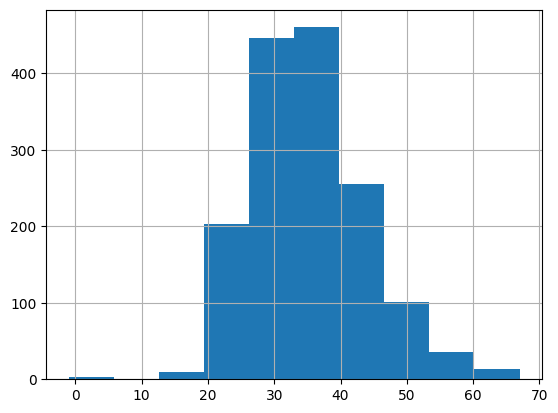

In [111]:
DemographicsDF['Age'].hist()

<Axes: xlabel='EmployeeCount'>

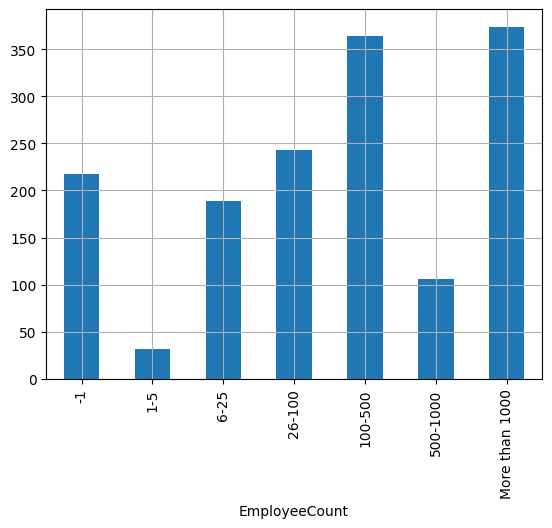

In [112]:

DemographicsDF['EmployeeCount'].value_counts().loc[['-1','1-5','6-25','26-100','100-500','500-1000','More than 1000']].plot.bar(grid=True)

In [113]:
DemographicsDF[DemographicsDF['SelfEmployed'] == 1]['EmployeeCount'].value_counts()

EmployeeCount
-1    217
Name: count, dtype: int64

In [115]:
DemographicsDF[DemographicsDF['SelfEmployed'] == 1]['TechCompany'].value_counts()

TechCompany
-1    217
Name: count, dtype: int64

After swapping the data types, I called the describe method to get an overview of the data alongside a few graphs to analzye the frequency of certain variables. The histogram and describe methods shows the data skews young with the mean being around 35. The businesses that people work at skew towards larger with more than a thousand and 100-500 being the two most common employee counts, though there are a decent amount of people who are self-employed or work for a company with 100 or fewer employees.

Additionally, I did figure out that all of the self-employed people also did not answer the tech company question nor did they answer the employee count question.


+